<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Tic_Tac_Toe_MinMax_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Juego de Tic Tac Toe

### Andrés Pérez, Cristian Zapata, Simón Jaramillo, Simón Gómez

In [ ]:
#Librerías necesarias.
import pydot
from IPython.display import Image, display
import queue
import numpy as np
import copy as cp
from pdb import set_trace
import random
import matplotlib.pyplot as plt

## Clase Nodo.

In [ ]:
class Node ():
  def __init__(self, state,value,operators,operator=None, parent=None,objective=None):
    self.state= state
    self.value = value
    self.children = []
    self.parent=parent
    self.operator=operator
    self.objective=objective
    self.level=0
    self.operators=operators
    self.v=0

    
  def add_child(self, value, state, operator):
    node=type(self)(value=value, state=state, operator=operator,parent=self,operators=self.operators)
    node.level=node.parent.level+1
    self.children.append(node)
    return node
  
  def add_node_child(self, node):
    node.level=node.parent.level+1
    self.children.append(node)    
    return node

  #Devuelve todos los estados según los operadores aplicados
  def getchildrens(self):
    return [
        self.getState(i) 
          if not self.repeatStatePath(self.getState(i)) 
            else None for i, op in enumerate(self.operators)]
    
  def getState(self, index):
    pass
  
  def __eq__(self, other):
    return self.state == other.state
 
  def __lt__(self, other):
    return self.f() < other.f()
   
  
  def repeatStatePath(self, state):
      n=self
      while n is not None and n.state!=state:
          n=n.parent
      return n is not None
    
  def pathObjective(self):
      n=self
      result=[]
      while n is not None:
          result.append(n)
          n=n.parent
      return result
  
  def heuristic(self):
    return 0
  
  def cost(self):
    return 1
  
  def f(self): 
    return self.cost()+self.heuristic()

  def isObjective(self):
    return (self.state==self.objetive.state)


## Clase Árbol.

In [ ]:
class Tree ():
  def __init__(self, root ,operators):
    self.root=root
    self.operators=operators

  def printPath(self,n):
    stack=n.pathObjective()
    path=stack.copy()
    while len(stack)!=0:
        node=stack.pop()
        if node.operator is not None:
            print(f'operador:  {self.operators[node.operator]} \t estado: {node.state}')
        else:
            print(f' {node.state}')
    return path

  def reinitRoot(self):
    self.root.operator=None
    self.root.parent=None
    self.root.objective=None
    self.root.children = []
    self.root.level=0

  #Primero a lo ancho
  def breadthFirst(self,endState):
    self.reinitRoot()
    pq=queue.Queue()
    pq.put(self.root)
    while not pq.empty():
      node=pq.get()
      children=node.getchildrens()
      for i,child in enumerate(children):
        if child is not None:
          newChild=node.add_child(value=node.value+'-'+str(i), state=child, operator=i)
          pq.put(newChild)
          if endState==child:
            return newChild

  #Primero en profundidad
  def dephFirst(self, endState):
    self.reinitRoot()
    pq=[]
    pq.append(self.root)    
    while len(pq)>0:
      node=pq.pop()
      if (node.parent is not None):
        node.parent.add_node_child(node)
      children=node.getchildrens()
      temp=[]
      for i,child in enumerate(children):
        if child is not None:
          newChild=type(self.root)(value=node.value+'-'+str(i),state=child,operator=i,parent=node, operators=node.operators)
          temp.append(newChild)
          if endState==child:
            node.add_node_child(newChild)
            return newChild
      #Adicionar los hijos en forma inversa para que salga primero el primero que se adicionó
      temp.reverse()
      for e in temp:
        pq.append(e)
  
  #Costo uniforme
  def costUniform(self,endState):
    self.reinitRoot()
    pq=queue.PriorityQueue()
    pq.put((self.root.cost(),self.root))
    while not pq.empty():
      node=pq.get()[1]
      children=node.getchildrens()
      for i,child in enumerate(children):
        if child is not None:
          newChild=node.add_child(value=node.value+'-'+str(i), 
                                  state=child, operator=i)
          pq.put((newChild.cost(),newChild))
          if endState==child:
            return newChild

  #Primero el mejor 
  def bestFirst(self,endState):
    self.reinitRoot()
    pq=queue.PriorityQueue()
    pq.put((self.root.heuristic(),self.root))
    while not pq.empty():
      node=pq.get()[1]
      children=node.getchildrens()
      for i,child in enumerate(children):
        if child is not None:
          newChild=node.add_child(value=node.value+'-'+str(i), 
                                  state=child, operator=i)
          pq.put((newChild.heuristic(),newChild))
          if endState==child:
            return newChild

  #A*
  def Aasterisk(self,endState):
    self.reinitRoot()
    pq=queue.PriorityQueue()
    pq.put((self.root.f(),self.root))
    while not pq.empty():
      node=pq.get()[1]
      children=node.getchildrens()
      for i,child in enumerate(children):
        if child is not None:
          newChild=node.add_child(value=node.value+'-'+str(i), 
                                  state=child, operator=i)
          pq.put((newChild.f(),newChild))
          if endState==child:
            return newChild

  #Generar los hijos del nodo     
  def miniMax(self, depth):
    self.root.v=self.miniMaxR(self.root, depth,True)
    #Comparar los hijos de root
    values=[c.v for c in self.root.children]
    #Si no tiene hijos se retorna a sí mismo
    if len(values) > 0:
      maxvalue=max(values)
      index=values.index(maxvalue)
      return self.root.children[index]
    else:
      return self.root

  def miniMaxR(self, node, depth,maxPlayer):
    if depth==0 or node.isObjective():
      node.v=node.heuristic()
      return node.heuristic()
    #Generar los hijos del nodo
    children=node.getchildrens()
    
    #Según el jugador que sea en el árbol se toman ciertas decisiones.
    if maxPlayer:
      value=float('-inf')
      for i,child in enumerate(children):
        if child is not None:
          newChild=type(self.root)(value=node.value+'-'+str(i),state=child,operator=i,parent=node, operators=node.operators,player=False)
          newChild=node.add_node_child(newChild)
          value=max(value,self.miniMaxR(newChild,depth-1,False))
    else:
      value=float('inf')
      for i,child in enumerate(children):
        if child is not None:
          newChild=type(self.root)(value=node.value+'-'+str(i),state=child,operator=i,parent=node, operators=node.operators,player=True)
          newChild=node.add_node_child(newChild)
          value=min(value,self.miniMaxR(newChild,depth-1,True))
    node.v=value
    return value

  #Método para dibujar el árbol        
  def draw(self,path):
    graph = pydot.Dot(graph_type='graph')
    nodeGraph=pydot.Node(str(self.root.state)+"-"+str(0),
                          label=str(self.root.state),shape ="circle", 
                          style="filled", fillcolor="red")
    graph.add_node(nodeGraph)
    path.pop()
    return self.drawTreeRec(self.root,nodeGraph,graph,0,path.pop(),path)
  
  #Método recursivo para dibujar el árbol  
  def drawTreeRec(self,r,rootGraph,graph,i,topPath,path):
    if r is not None:
      children=r.children
      for j,child in enumerate(children):
        i=i+1
        color="white"
        if topPath.value==child.value:
          if len(path)>0:topPath=path.pop()
          color='red'
        c=pydot.Node(child.value,label=str(child.state)+r"\n"+r"\n"+"f="+str(child.heuristic())+r"\n"+str(child.v), 
                      shape ="circle", style="filled", 
                      fillcolor=color)
        graph.add_node(c)
        graph.add_edge(pydot.Edge(rootGraph, c, 
                                  label=str(child.operator)+'('+str(child.cost())+')'))
        graph=self.drawTreeRec(child,c,graph,i,topPath,path)
      return graph
    else:
      return graph  

# **Juego Tic Tac Toe**

## Nodo J.

Vamos a suponer que se comienza con Max (True). La heurística son las jugadas que le permiten ganar llenando columnas, diagonales y filas.

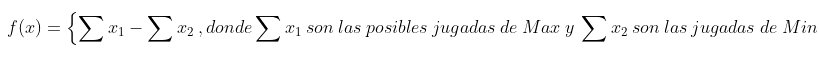

In [ ]:
class NodeTicTacToe(Node):
  def __init__(self, player=True,**kwargs):
    super(NodeTicTacToe, self).__init__(**kwargs)
    self.player=player
    self.ganador='' 
    if player:
      self.v=float('-inf')
    else:
      self.v=float('inf')
  
  def getState(self, index):
    state=self.state
    nextState=None
    (x,y)=self.operators[index]
    if state[x][y]==' ':
      nextState= [f.copy() for f in state]
      if self.player==True: #Si es Max se pone X    
        nextState[x][y]='X'
      else: #Si es Min se pone O
        nextState[x][y]='O'
    return nextState if state!=nextState else None

  def cost(self):
    return self.level
  
  #Ver si el nodo es un nodo objetivo para O o para X, o hay empate
  def isObjective(self):
    a=[f.copy() for f in self.state]
    b=np.array(a).T
    a.append(np.diag(self.state))
    a.append(np.flipud(self.state).diagonal())
    a=np.array(a)
    c=np.concatenate((a,b),axis=0)
    for f in c:
      if f[0]!=' ' and all(x == f[0] for x in f):
        #Se retorna al jugador ganador generado en el ultimo nodo
        self.ganador = f[0]
        return True
    #Empate
    if not np.in1d([' '], self.state):
      return True
    return False 

  # Si es nodo objetivo, si X retornamos 1, si O -1 y si no 0
  def heuristic(self):
    count_x=0
    count_o=0
    suma_x=0
    suma_o=0
    a=[f.copy() for f in self.state]
    b=np.array(a).T
    a.append(np.diag(self.state))
    a.append(np.flipud(self.state).diagonal())
    a=np.array(a)
    c=np.concatenate((a,b),axis=0)
    #Estados ganadores para Max y Min
    #Esta heurística se calcula a partir de la diferencia entre la cantidad de jugadas de cada parte
    for f in c:
      if ' ' in f and 'X' in f and 'O' not in f:
        count_x=count_x+1
      if ' ' in f and 'O' in f and 'X' not in f:
        count_o=count_o+1
      #Básicamente, estamos proponiendo el hecho de que entre más espacios vacíos tenga quien juega, más fácil será realizar jugadas ganadoras.
      if all(pos == ' ' for pos in f) or count_x==3 or all(pos == 'X' for pos in f):
        suma_x=suma_x+1
      if all(pos == ' ' for pos in f) or count_o==3 or all(pos == 'O' for pos in f):
        suma_o=suma_o+1      
    return suma_x-suma_o

In [ ]:
def print_tic_tac_toe(values, end=False):
    matriz = cp.deepcopy(values)
    count = 0
    i = 0
    j = 0
    for row in matriz:  
      for pos in row:        
        count += 1
        if pos == ' ':
          if end == False:
            matriz[i][j] = str(count)
        j += 1
      i += 1
      j = 0

    print("\n")
    print("\t     |     |")
    print("\t  {}  |  {}  |  {}".format(matriz[0][0], matriz[0][1], matriz[0][2]))
    print('\t_____|_____|_____')
 
    print("\t     |     |")
    print("\t  {}  |  {}  |  {}".format(matriz[1][0], matriz[1][1], matriz[1][2]))
    print('\t_____|_____|_____')
 
    print("\t     |     |")
 
    print("\t  {}  |  {}  |  {}".format(matriz[2][0], matriz[2][1], matriz[2][2]))
    print("\t     |     |")
    print("\n")
    return matriz

In [ ]:
def find_pos(tab, opc):
  arr = np.array(tab)
  position_opc = np.where(arr == str(opc))
  if len(position_opc) > 0:
  # Devuelve la posicion para ubicarla en el tablero
    try:
      return position_opc[0][0], position_opc[1][0]
    except:
      raise IndexError("Valor inválido")
  else:
    raise IndexError("Valor inválido")

In [ ]:
#Para volver el juego más dinámico, es pertinente que como entrada, el jugador pueda digitar una dificultad, que estará directamente relacionada a la profundidad.
def jugar(dificultad):
  jugada = None
  treeMinMax = None
  isObjective = False
  opcion = 0
  first_play = 0
  operators = []
  nodeInit = None
  initState= [[' ',' ',' '], 
              [' ',' ',' '], 
              [' ',' ',' ']]
  i = 0
  j = 0
  isObjective = False
  opc_valid = False
  opcion = 0
  first_play = 0
  tablero = initState.copy()

  #La primera jugada de la computadora será aleatoria, sin heurística; esto lo hacemos simplemente para que en cada partida haya movimientos diferentes.
  print("#############################################")
  print("     Nueva partida. Juega la computadora     ")
  print("#############################################")
  first_play = random.randint(1, 10)
  tablero = print_tic_tac_toe(initState)
  i, j = find_pos(tablero, first_play)
  initState[i][j] = 'X'

  while not isObjective:
    tablero = print_tic_tac_toe(initState)
    while not opc_valid:
      try:
        opcion = int(input(" Ingrese la posicion que desea jugar "))        
        opc_valid = True
      except IndexError:
        opc_valid = False
        
    i, j = find_pos(tablero, opcion)
    initState[i][j] = 'O'
    operators=[(i,j) for i,f in enumerate(initState) for j,c in enumerate(f)]
    nodeInit=NodeTicTacToe(True,value="inicio",state=initState, operators= operators)
    treeMinMax= Tree(nodeInit,operators)  
    jugada=treeMinMax.miniMax(dificultad)
    initState = jugada.state
    isObjective = jugada.isObjective()
    opc_valid = False
    i = 0
    j = 0

  if jugada.ganador == 'X':
    print("\nHa ganado la máquina!")
  elif jugada.ganador == 'O':     
    print("\nHa ganado el jugador!")
  else:
    print("\nEmpate!")

  tablero = print_tic_tac_toe(jugada.state, True)
  return jugada.ganador

## Prueba

In [ ]:
# Cantidad de Victorias, Derrotas y empates en cada dificultad
partidas_jugadas = {1: [ 0, 0, 0], 2: [ 0, 0, 0 ], 3: [ 0, 0, 0 ]}

In [ ]:
partidas = 0
jugar_nuevamente = False
dif_valida = False
while not dif_valida:
    dificultad = int(input("Por favor ingrese una dificultad entre 1 y 3: "))
    if isinstance(dificultad, int) and 1 <= dificultad <= 3:
      dif_valida = True
    else:
      dif_valida = False

while not jugar_nuevamente:
  ganador = ''
  ganador = jugar(dificultad)
  if ganador == 'X':
    #Se suma una derrota al jugador
    partidas_jugadas[dificultad][1] = partidas_jugadas[dificultad][1] + 1
  elif ganador == 'O':
    #Se suma una victoria al jugador
    partidas_jugadas[dificultad][0] = partidas_jugadas[dificultad][0] + 1
  else:
    #Se suma un empate al jugador
    partidas_jugadas[dificultad][2] = partidas_jugadas[dificultad][2] + 1

  opc = input("Desea jugar nuevamente S/N ")
  if opc == 'N':
    jugar_nuevamente = True

Por favor ingrese una dificultad entre 1 y 3: 3
#############################################
     Nueva partida. Juega la computadora     
#############################################


	     |     |
	  1  |  2  |  3
	_____|_____|_____
	     |     |
	  4  |  5  |  6
	_____|_____|_____
	     |     |
	  7  |  8  |  9
	     |     |




	     |     |
	  1  |  2  |  3
	_____|_____|_____
	     |     |
	  4  |  5  |  6
	_____|_____|_____
	     |     |
	  7  |  8  |  X
	     |     |


 Ingrese la posicion que desea jugar 3


	     |     |
	  1  |  2  |  O
	_____|_____|_____
	     |     |
	  4  |  X  |  6
	_____|_____|_____
	     |     |
	  7  |  8  |  X
	     |     |


 Ingrese la posicion que desea jugar 1


	     |     |
	  O  |  X  |  O
	_____|_____|_____
	     |     |
	  4  |  X  |  6
	_____|_____|_____
	     |     |
	  7  |  8  |  X
	     |     |


 Ingrese la posicion que desea jugar 8


	     |     |
	  O  |  X  |  O
	_____|_____|_____
	     |     |
	  X  |  X  |  6
	_____|_____|_____

In [ ]:
print(partidas_jugadas)

{1: [4, 0, 1], 2: [0, 1, 4], 3: [0, 2, 3]}


##Resumen y Análisis

In [ ]:
print("En el nivel de profundidad {} se lograron {} victorias, {} derrotas y {} empates del jugador".format(1,partidas_jugadas[1][0],partidas_jugadas[1][1],partidas_jugadas[1][2]))
print("En el nivel de profundidad {} se lograron {} victorias, {} derrotas y {} empates del jugador".format(2,partidas_jugadas[2][0],partidas_jugadas[2][1],partidas_jugadas[2][2]))
print("En el nivel de profundidad {} se lograron {} victorias, {} derrotas y {} empates del jugador".format(3,partidas_jugadas[3][0],partidas_jugadas[3][1],partidas_jugadas[3][2]))

En el nivel de profundidad 1 se lograron 4 victorias, 0 derrotas y 1 empates del jugador
En el nivel de profundidad 2 se lograron 0 victorias, 1 derrotas y 4 empates del jugador
En el nivel de profundidad 3 se lograron 0 victorias, 2 derrotas y 3 empates del jugador


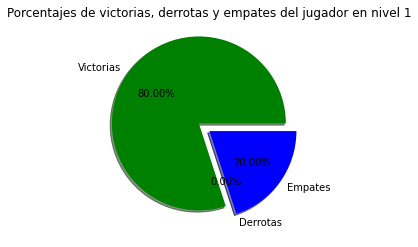

In [ ]:
#Interfaz gráfica que enseña los resultados.
import matplotlib.pyplot as plt
estados= ['Victorias','Derrotas','Empates']
valores= partidas_jugadas[1]
colores= ['green','grey','blue']
explode_vals= [0.15,0,0]
plt.pie(x=valores, labels=estados, colors= colores, autopct='%1.2f%%', shadow=True,
explode= explode_vals)
plt.title('Porcentajes de victorias, derrotas y empates del jugador en nivel 1')
plt.show()

En este caso, se puede observar que el nivel de profundidad de la heurística hace que sea fácil no perder contra la máquina.

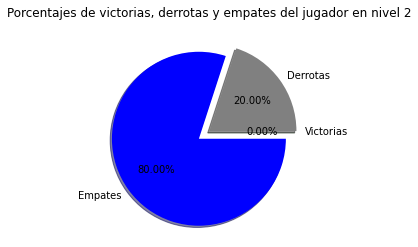

In [ ]:
import matplotlib.pyplot as plt
estados= ['Victorias','Derrotas','Empates']
valores= partidas_jugadas[2]
colores= ['green','grey','blue']
explode_vals= [0,0,0.15]
plt.pie(x=valores, labels=estados, colors= colores, autopct='%1.2f%%', shadow=True,
explode= explode_vals)
plt.title('Porcentajes de victorias, derrotas y empates del jugador en nivel 2')
plt.show()

Como era esperable, cada vez que aumenta el nivel, la máquina se vuelve más buena, haciendo que ahora no solo empate, sino que también pueda ganar.

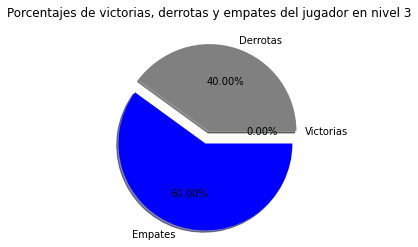

In [ ]:
import matplotlib.pyplot as plt
estados= ['Victorias','Derrotas','Empates']
valores= partidas_jugadas[3]
colores= ['green','grey','blue']
explode_vals= [0,0,0.15]
plt.pie(x=valores, labels=estados, colors= colores, autopct='%1.2f%%', shadow=True,
explode= explode_vals)
plt.title('Porcentajes de victorias, derrotas y empates del jugador en nivel 3')
plt.show()

Finalmente, con el nivel de dificultad alta, aumenta el margen de derrotas (victorias de la máquina), y se reduce el de empates, obliterando completamente el de ganancias propias.

##Revisión de las dificultades según la profundidad

Cuando el nivel de produndidad es 1. No siempre escoge la jugada que más le beneficia porque no sabe qué jugada realizará el contrincante.

 [['X', ' ', ' '], ['O', 'O', ' '], ['X', ' ', ' ']]
operador:  (0, 2) 	 estado: [['X', ' ', 'X'], ['O', 'O', ' '], ['X', ' ', ' ']]


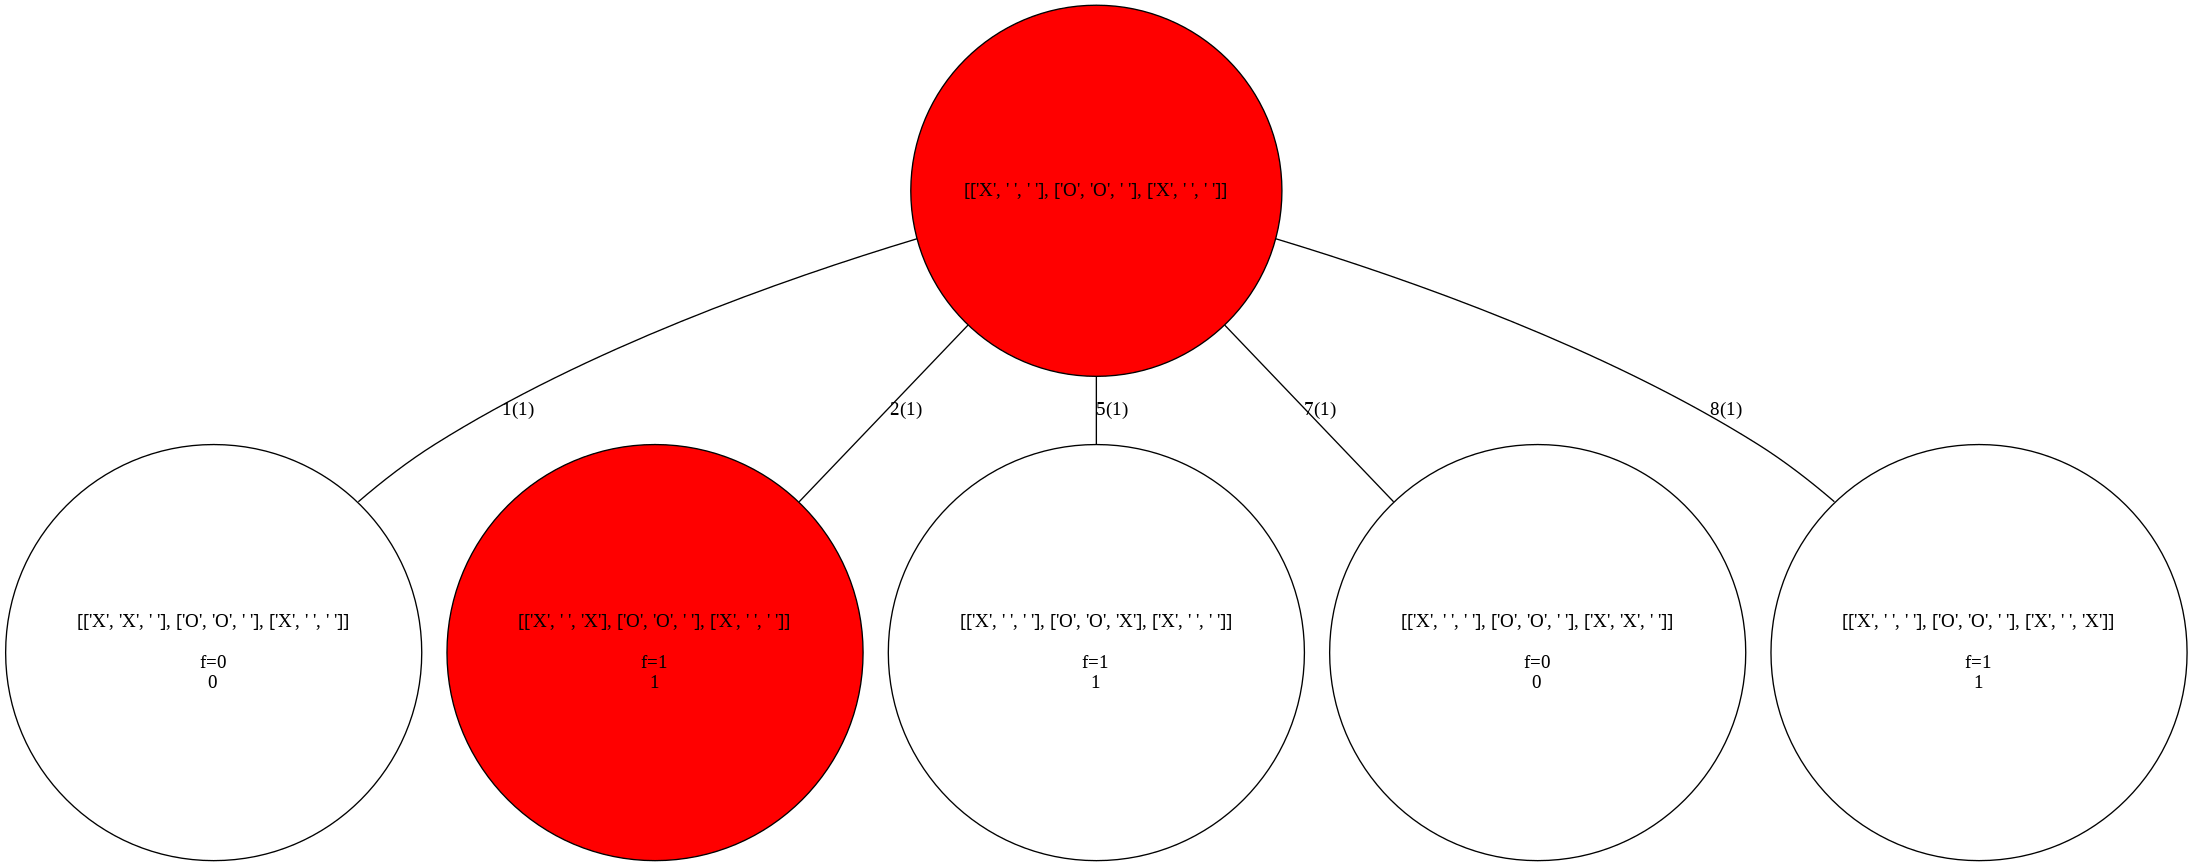

In [ ]:
#'poner ficha en casilla vacía fila f, columna c', lista de posiciones para poner la ficha
initState=[['X',' ',' '], 
           ['O','O',' '], 
           ['X',' ',' ']]
operators=[(i,j) for i,f in enumerate(initState) for j,c in enumerate(f)]
nodeInit=NodeTicTacToe(True,value="inicio",state=initState, operators= operators)
treeMinMax= Tree(nodeInit,operators)
objective=treeMinMax.miniMax(1)
path=treeMinMax.printPath(objective)
graph=treeMinMax.draw(path.copy())
tree_image = Image(graph.create_png(), width=900, height=500)
display(tree_image)

Cuando el nivel de produndidad es 2, ya sabrá cual será la posible jugada del contrincante, por lo que podrá tomar una mejor decisión. Después del nivel 2 sólo es posible empatarle a la máquina, pues esta preverá en cualquier momento, cuál es la anticipación del adversario.

 [['X', ' ', ' '], ['O', 'O', ' '], ['X', ' ', ' ']]
operador:  (1, 2) 	 estado: [['X', ' ', ' '], ['O', 'O', 'X'], ['X', ' ', ' ']]


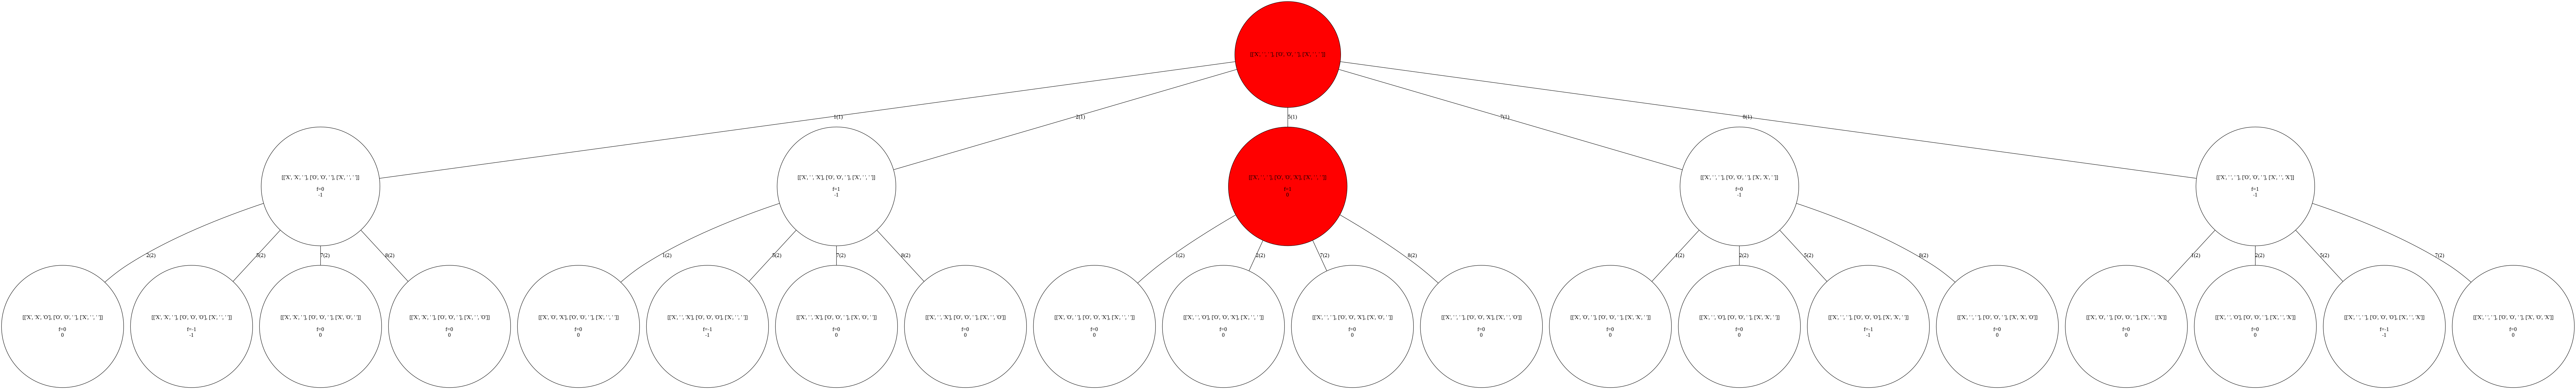

In [ ]:
#'poner ficha en casilla vacía fila f, columna c', lista de posiciones para poner la ficha
initState=[['X',' ',' '], 
           ['O','O',' '], 
           ['X',' ',' ']]
operators=[(i,j) for i,f in enumerate(initState) for j,c in enumerate(f)]
nodeInit=NodeTicTacToe(True,value="inicio",state=initState, operators= operators)
treeMinMax= Tree(nodeInit,operators)
objective=treeMinMax.miniMax(2)
path=treeMinMax.printPath(objective)
graph=treeMinMax.draw(path.copy())
tree_image = Image(graph.create_png(), width=900, height=500)
display(tree_image)

Cuando el nivel de produndidad es 3, ya conocerá una de las jugadas del contrincante y 2 posibles jugadas a futuro de él mismo. Con esta información podrá tomar aún mejores decisiones. 

 [['X', ' ', ' '], ['O', 'O', ' '], ['X', ' ', ' ']]
operador:  (1, 2) 	 estado: [['X', ' ', ' '], ['O', 'O', 'X'], ['X', ' ', ' ']]


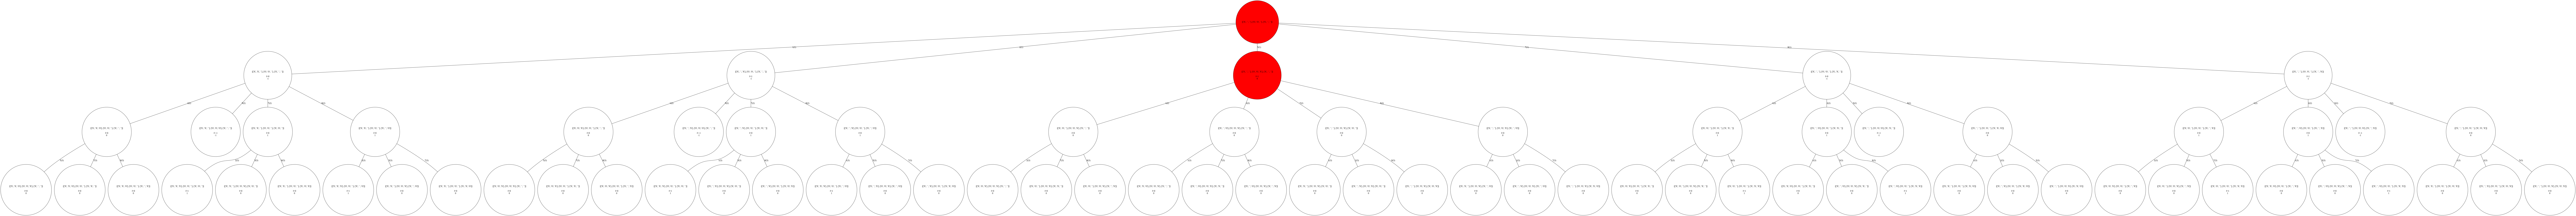

In [ ]:
initState=[['X',' ',' '], 
           ['O','O',' '], 
           ['X',' ',' ']]
operators=[(i,j) for i,f in enumerate(initState) for j,c in enumerate(f)]
nodeInit=NodeTicTacToe(True,value="inicio",state=initState, operators= operators)
treeMinMax= Tree(nodeInit,operators)
objective=treeMinMax.miniMax(3)
path=treeMinMax.printPath(objective)
graph=treeMinMax.draw(path.copy())
tree_image = Image(graph.create_png(), width=900, height=500)
display(tree_image)